# **EDA-1**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [3]:
df = pd.read_csv("/content/BIKE DETAILS.csv")

In [5]:
# 1. Range of selling prices
selling_price_range = df['selling_price'].max() - df['selling_price'].min()
selling_price_range

755000

In [6]:
# 2. Median selling price
median_selling_price = df['selling_price'].median()
median_selling_price

45000.0

In [7]:
# 3. Most common seller type
most_common_seller = df['seller_type'].mode()[0]
most_common_seller

'Individual'

In [8]:
# 4. Count of bikes driven more than 50,000 km
bikes_above_50k_km = (df['km_driven'] > 50000).sum()
bikes_above_50k_km

170

In [9]:
# 5. Average km_driven for each ownership type
average_km_by_owner = df.groupby('owner')['km_driven'].mean()
average_km_by_owner

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [11]:
# 6. Proportion of bikes from 2015 or older
bikes_2015_or_older = (df['year'] <= 2015).sum()
total_bikes = len(df)
proportion_old_bikes = bikes_2015_or_older / total_bikes

proportion_old_bikes

0.5664467483506126

In [12]:
# 7. Checking missing values in the dataset
missing_values = df.isnull().sum()
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [18]:
# 8. Highest ex_showroom_price and corresponding bike
max_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_max_ex_price = df[df['ex_showroom_price'] == max_ex_showroom_price]['name'].values[0]


print(f"Highest ex_showroom_price recorded:     {max_ex_showroom_price}")
print(f"Bike with the highest ex_showroom_price:    {bike_with_max_ex_price}")

Highest ex_showroom_price recorded:     1278000.0
Bike with the highest ex_showroom_price:    Harley-Davidson Street Bob


In [21]:
# 9. Total number of bikes listed by each seller type
bikes_by_seller_type = df['seller_type'].value_counts()

bikes_by_seller_type

,count
seller_type,
Individual,1055
Dealer,6


In [22]:
# 10. Relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df[df['owner'] == "1st owner"]
correlation = first_owner_bikes[['selling_price', 'km_driven']].corr().iloc[0, 1]

correlation

-0.24348174844965695

In [23]:
# 11. Removing outliers in km_driven using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

df_filtered.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


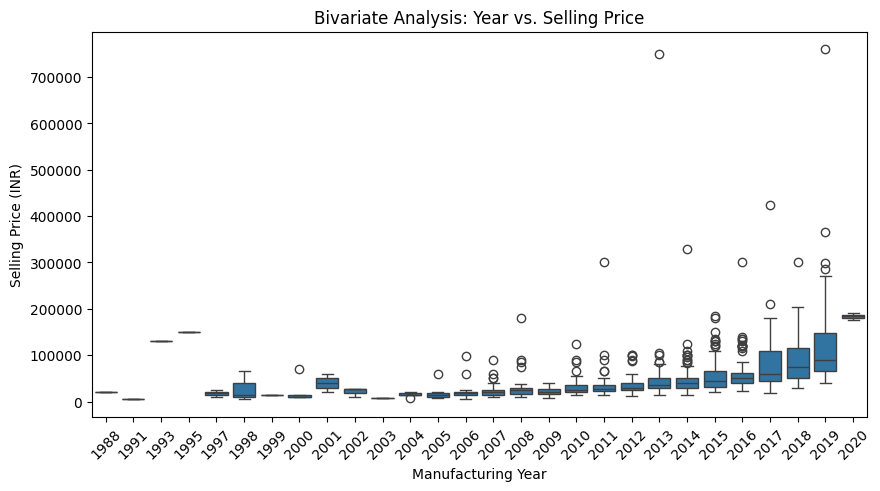

In [25]:
# 12. Bivariate Analysis: Year vs. Selling Price
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['year'], y=df['selling_price'])
plt.xticks(rotation=45)
plt.title("Bivariate Analysis: Year vs. Selling Price")
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (INR)")
plt.show()

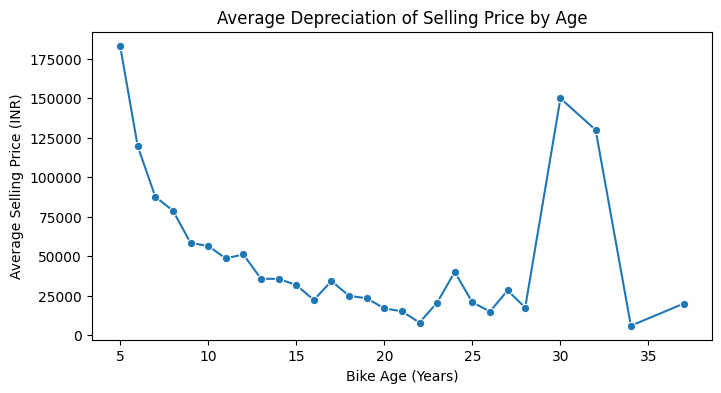

In [26]:
# 13. Average depreciation in selling price based on age
current_year = datetime.datetime.now().year
df['age'] = current_year - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean()

plt.figure(figsize=(8, 4))
sns.lineplot(x=avg_depreciation.index, y=avg_depreciation.values, marker="o")
plt.title("Average Depreciation of Selling Price by Age")
plt.xlabel("Bike Age (Years)")
plt.ylabel("Average Selling Price (INR)")
plt.show()

In [28]:
# 14. Bikes priced significantly above the average for their manufacturing year
df['year_avg_price'] = df.groupby('year')['selling_price'].transform('mean')
df['price_diff'] = df['selling_price'] - df['year_avg_price']

# Set threshold (1.5 times standard deviation above mean price for the year)
threshold = df['price_diff'].std() * 1.5
high_priced_bikes = df[df['price_diff'] > threshold][['name', 'year', 'selling_price']]

print("Bikes priced significantly above the average for their manufacturing year:")
print(high_priced_bikes)

Bikes priced significantly above the average for their manufacturing year:
                                     name  year  selling_price
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
42                           KTM 390 Duke  2017         175000
70                    Mahindra Mojo XT300  2017         165000
130      Royal Enfield Continental GT 650  2019         299000
134            Harley-Davidson Street Bob  2013         750000
137          KTM 390 Duke ABS [2013-2016]  2015         130000
146                            KTM RC 390  2017         180000
149                          KTM 390 Duke  2017         170000
179             Royal Enfield Classic 350  2018         170000
208              Royal Enfield Bullet 500  2015         130000
213              Bajaj Dominar 400 [2018]  2018         170000
242                            KTM RC 390  2017         210000
261         Royal Enfield Interceptor 650  

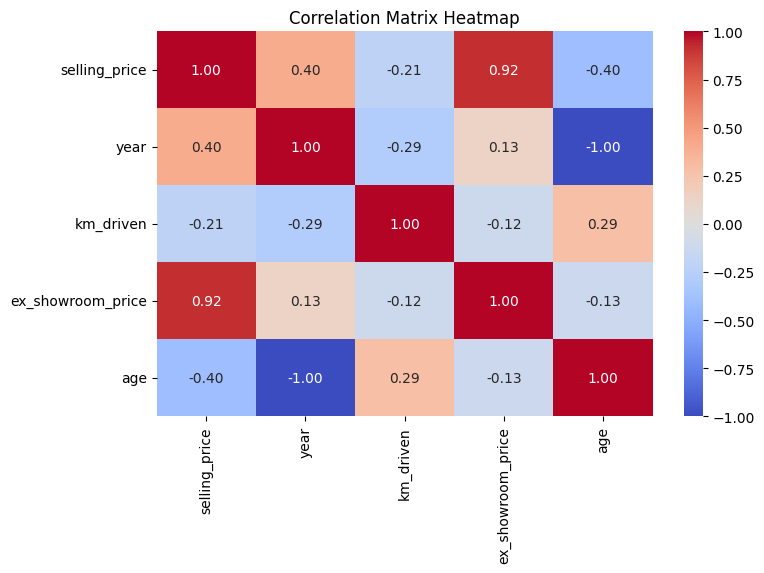

In [29]:
# 15. Correlation Matrix for Numeric Columns with Heatmap
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['year_avg_price', 'price_diff'])  # Exclude added columns
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# **EDA-2**

In [32]:
df = pd.read_csv("/content/Car Sale.csv")

In [33]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

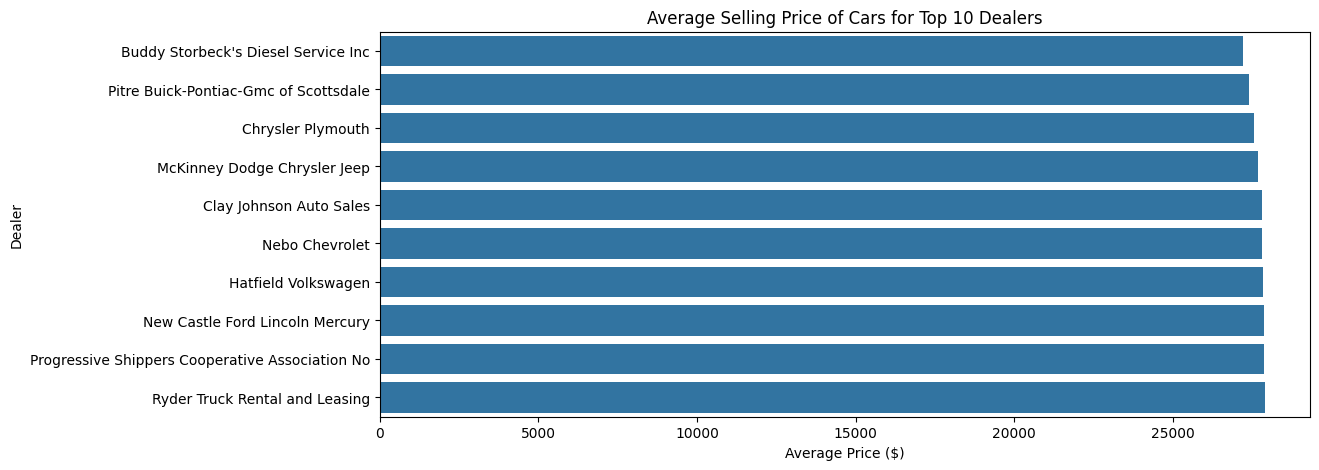

In [34]:
# 1. Average selling price for each dealer
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values()
plt.figure(figsize=(12, 5))
sns.barplot(y=dealer_avg_price.index[:10], x=dealer_avg_price.values[:10])
plt.title("Average Selling Price of Cars for Top 10 Dealers")
plt.xlabel("Average Price ($)")
plt.ylabel("Dealer")
plt.show()

In [35]:
# 2. Car brand with highest price variation
brand_price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Car brands with highest price variation:\n", brand_price_variation.head())

Car brands with highest price variation:
 Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Name: Price ($), dtype: float64


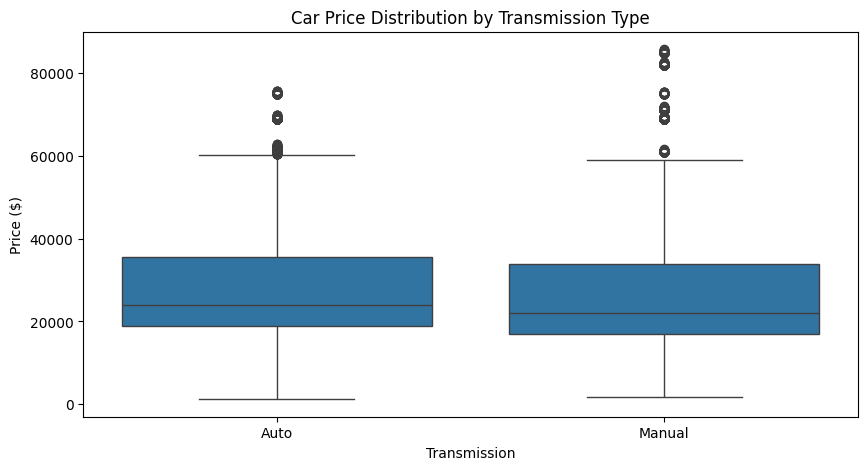

In [36]:
# 3. Distribution of car prices for each transmission type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title("Car Price Distribution by Transmission Type")
plt.show()

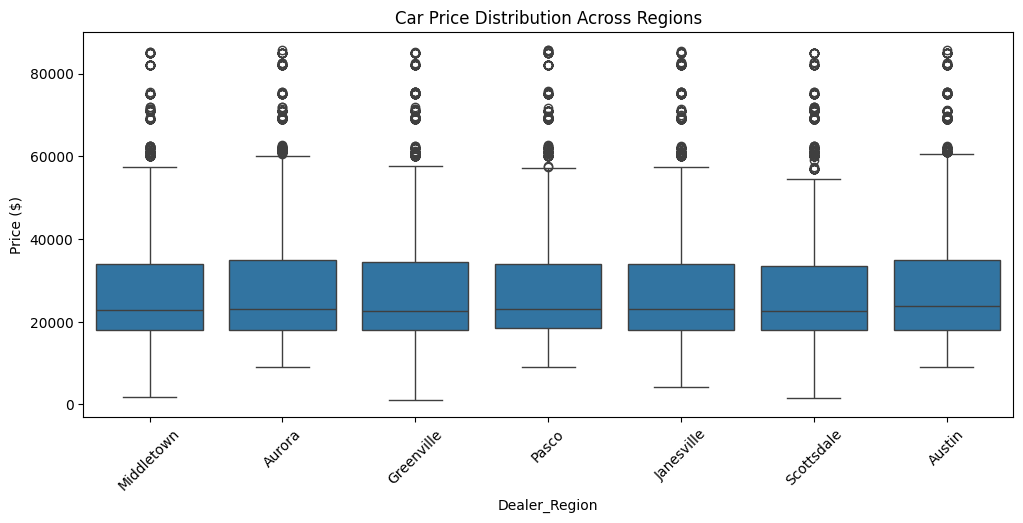

In [37]:
# 4. Distribution of car prices across different regions
plt.figure(figsize=(12, 5))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.xticks(rotation=45)
plt.title("Car Price Distribution Across Regions")
plt.show()

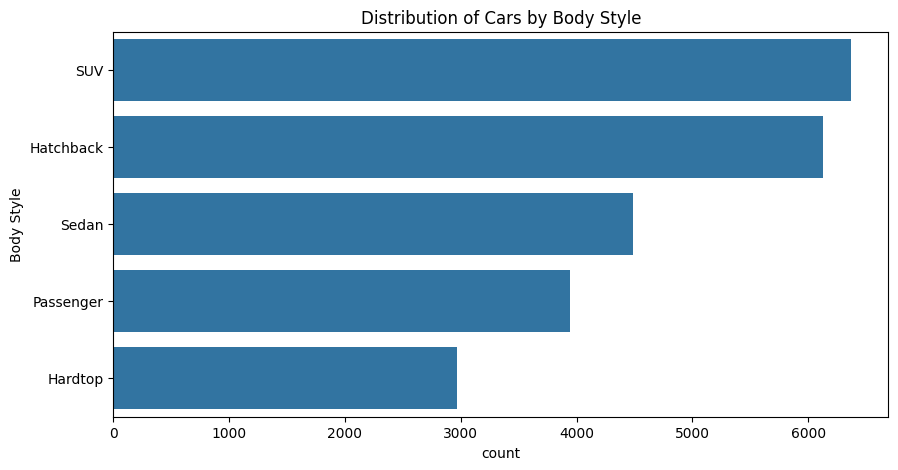

In [38]:
# 5. Distribution of cars based on body styles
plt.figure(figsize=(10, 5))
sns.countplot(y='Body Style', data=df, order=df['Body Style'].value_counts().index)
plt.title("Distribution of Cars by Body Style")
plt.show()

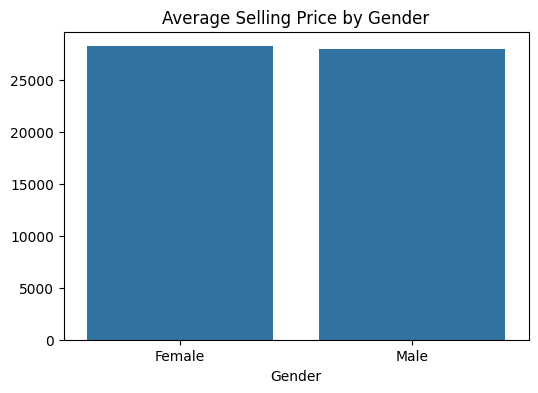

In [39]:
# 6. Average selling price by customer gender and annual income
gender_avg_price = df.groupby('Gender')['Price ($)'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_avg_price.index, y=gender_avg_price.values)
plt.title("Average Selling Price by Gender")
plt.show()

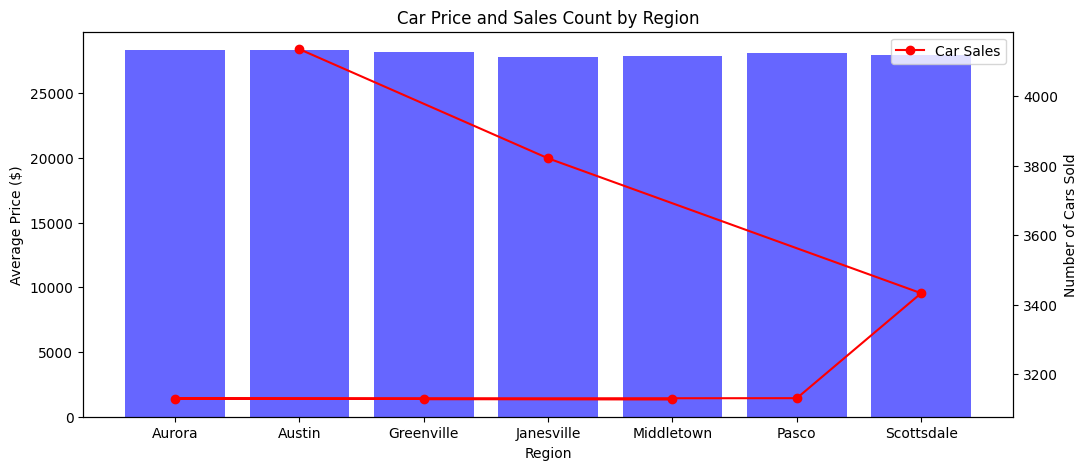

In [40]:
# 7. Car prices and number of cars sold by region
region_avg_price = df.groupby('Dealer_Region')['Price ($)'].mean()
region_sales_count = df['Dealer_Region'].value_counts()

fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()
ax1.bar(region_avg_price.index, region_avg_price.values, color='b', alpha=0.6, label='Avg Price')
ax2.plot(region_sales_count.index, region_sales_count.values, color='r', marker='o', label='Car Sales')
plt.title("Car Price and Sales Count by Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Average Price ($)")
ax2.set_ylabel("Number of Cars Sold")
plt.legend()
plt.show()

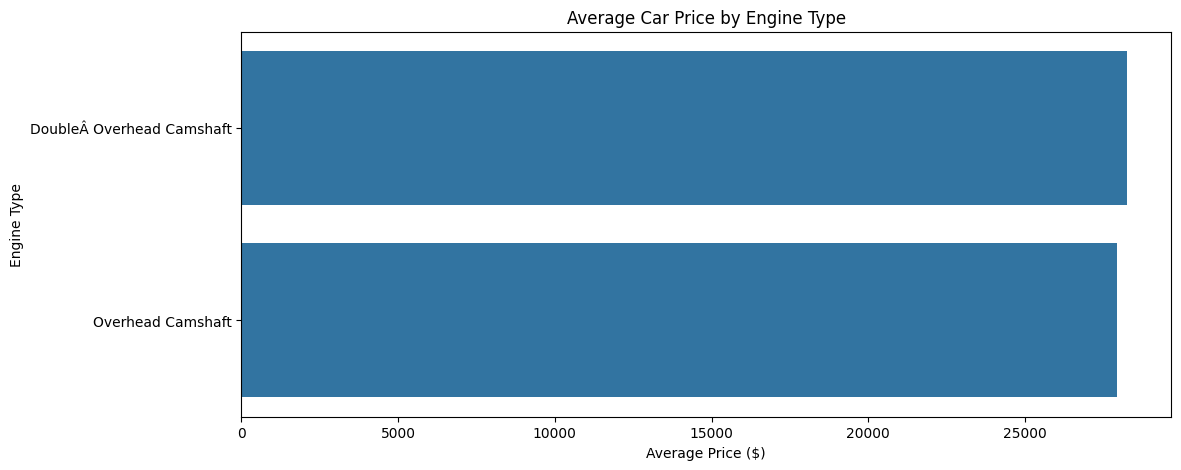

In [41]:
# 8. Average car price by engine type
engine_avg_price = df.groupby('Engine')['Price ($)'].mean()
plt.figure(figsize=(12, 5))
sns.barplot(y=engine_avg_price.index[:10], x=engine_avg_price.values[:10])
plt.title("Average Car Price by Engine Type")
plt.xlabel("Average Price ($)")
plt.ylabel("Engine Type")
plt.show()

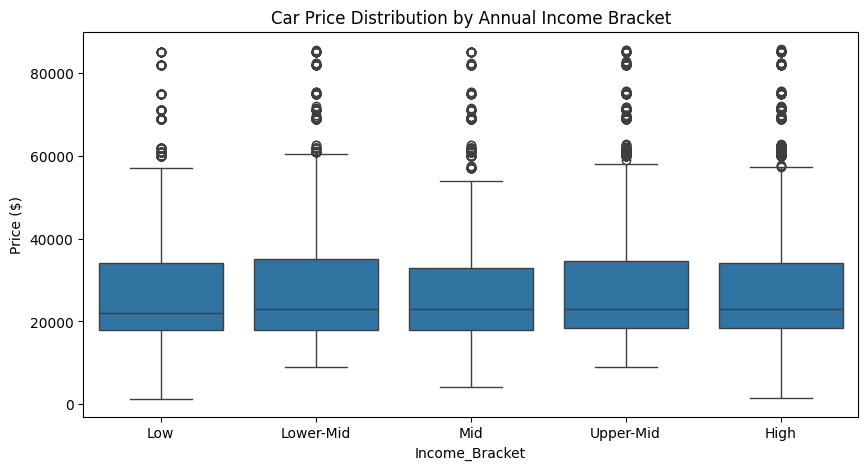

In [42]:
# 9. Car price variation based on annual income bracket
df['Income_Bracket'] = pd.qcut(df['Annual Income'], 5, labels=['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High'])
plt.figure(figsize=(10, 5))
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df)
plt.title("Car Price Distribution by Annual Income Bracket")
plt.show()

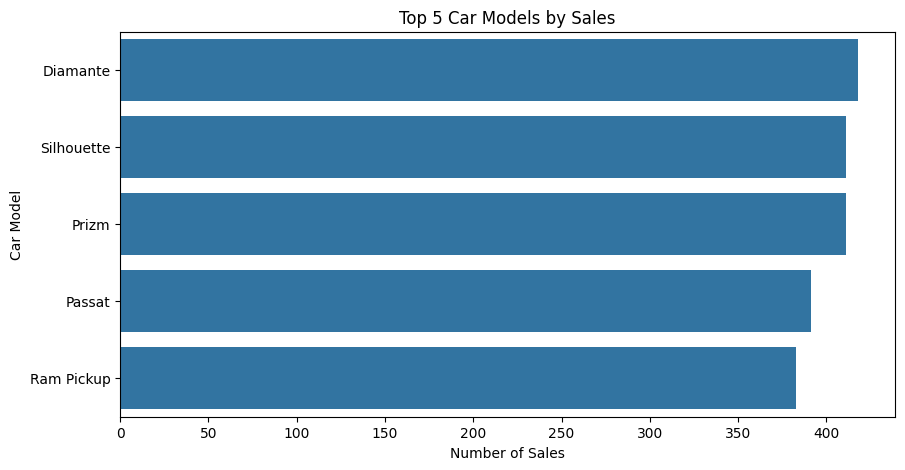

In [43]:
# 10. Top 5 car models with the highest sales
top_models = df['Model'].value_counts().head(5)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_models.index, x=top_models.values)
plt.title("Top 5 Car Models by Sales")
plt.xlabel("Number of Sales")
plt.ylabel("Car Model")
plt.show()

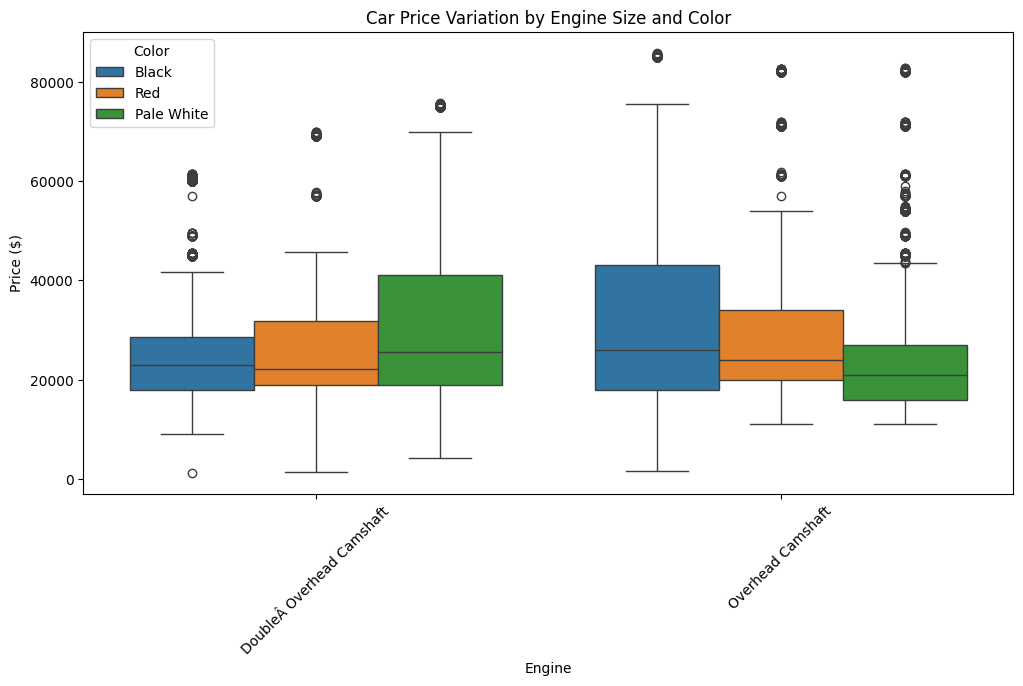

In [44]:
# 11. Car price variation with engine size and car color
plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.xticks(rotation=45)
plt.title("Car Price Variation by Engine Size and Color")
plt.show()

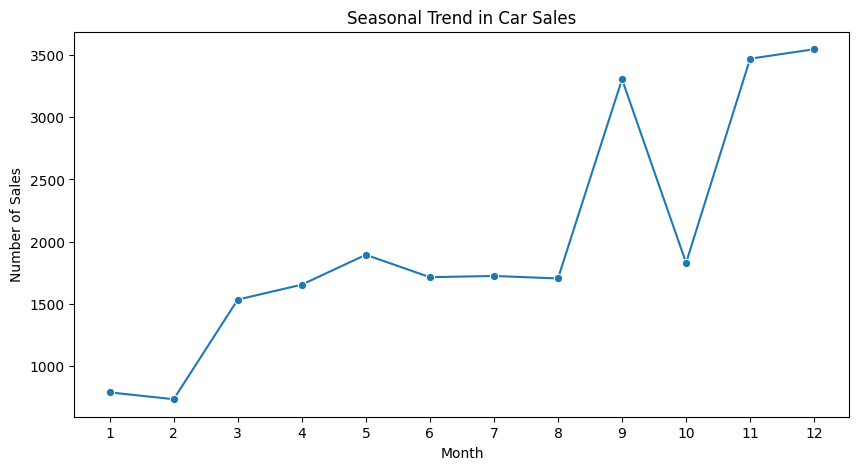

In [45]:
# 12. Seasonal trend in car sales
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Car_id'].count()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Seasonal Trend in Car Sales")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(range(1, 13))
plt.show()

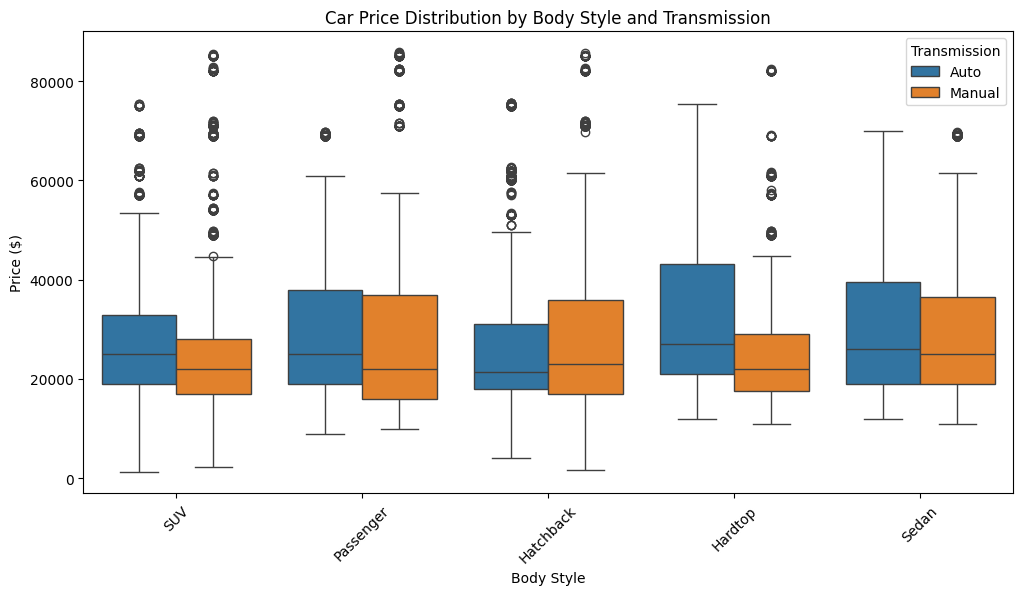

In [46]:
# 13. Car price distribution by body style and transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Body Style and Transmission")
plt.show()

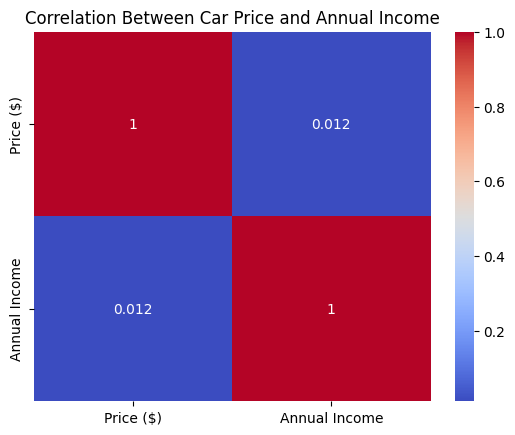

In [47]:
# 14. Correlation between car price, engine size, and annual income
corr_matrix = df[['Price ($)', 'Annual Income']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Car Price and Annual Income")
plt.show()

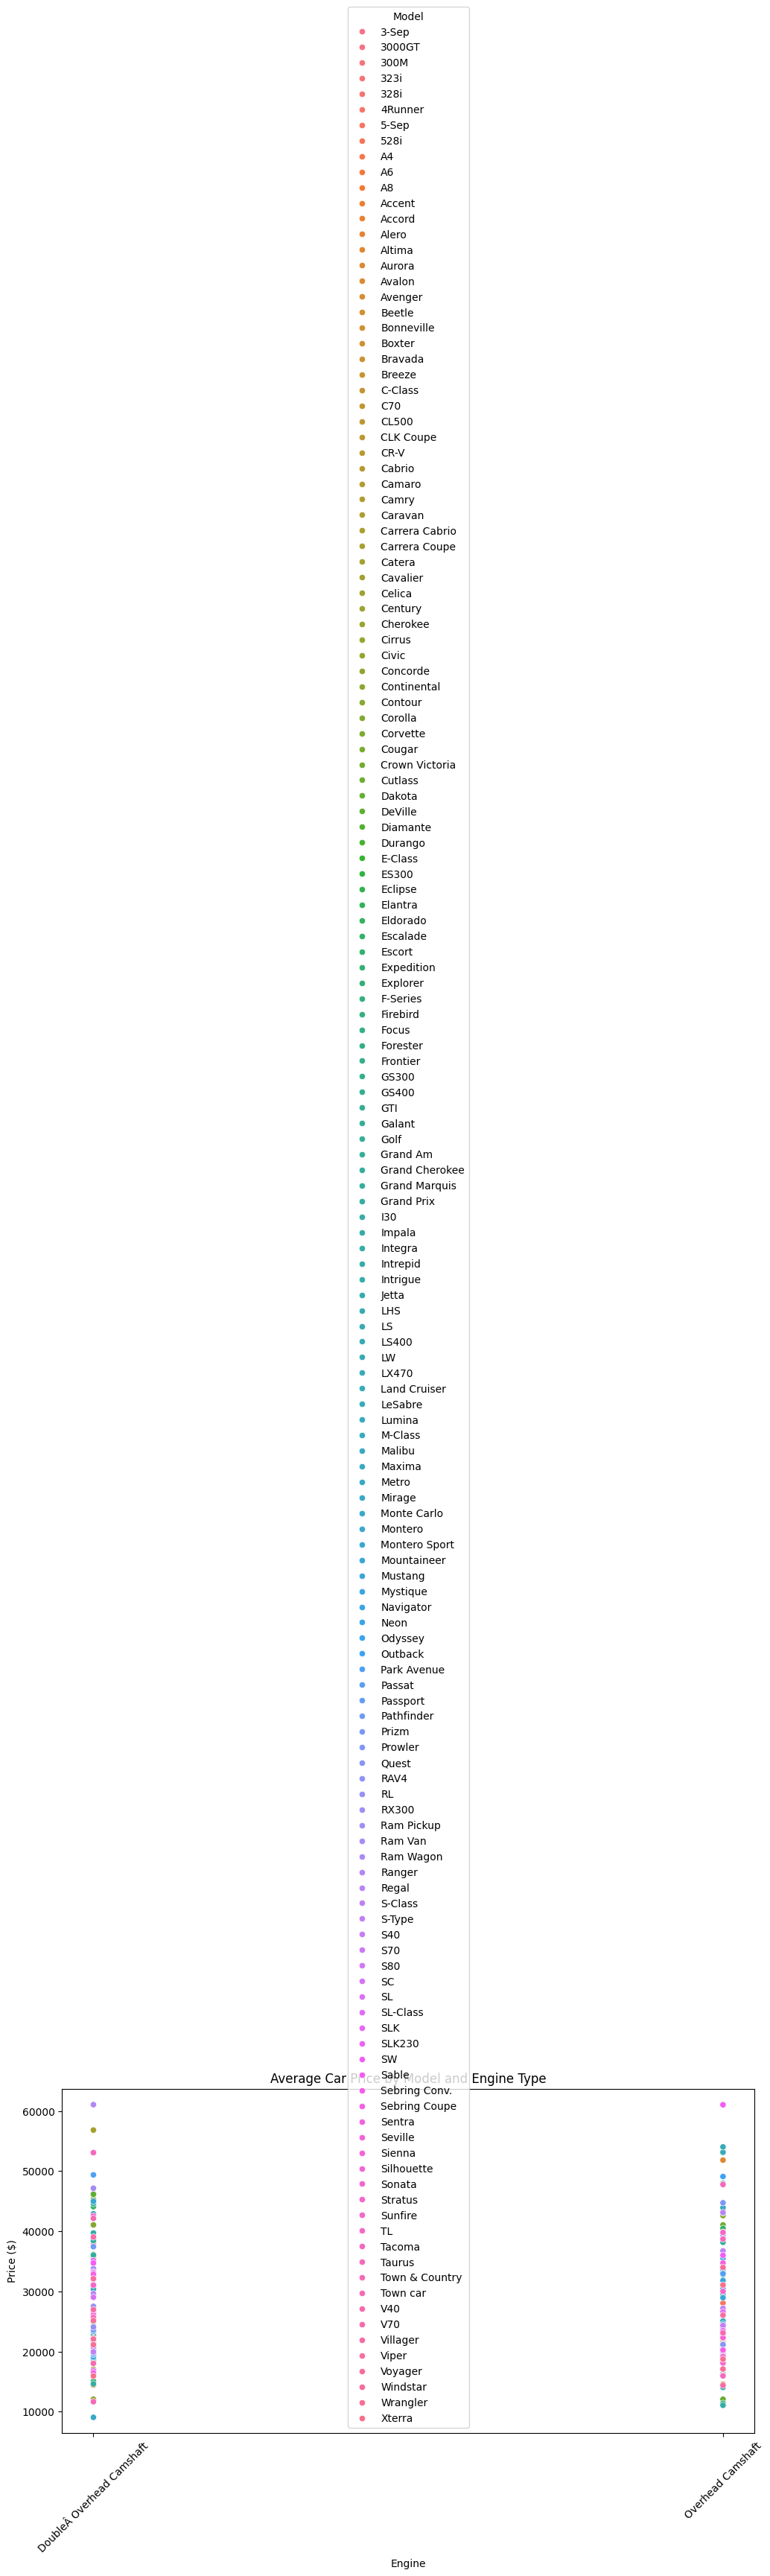

In [48]:
# 15. Average car price by model and engine type
model_engine_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Engine', y='Price ($)', hue='Model', data=model_engine_price)
plt.xticks(rotation=45)
plt.title("Average Car Price by Model and Engine Type")
plt.show()

# **EDA-3**

In [18]:
df = pd.read_csv("/content/amazon.csv")

In [19]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [26]:
df.shape

(1465, 16)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [21]:
# Convert necessary columns to numeric
df['discounted_price'] = df['discounted_price'].replace('[^0-9]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[^0-9]', '', regex=True).astype(float)
df['discount_percentage'] = df['discount_percentage'].replace('[^0-9]', '', regex=True).astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         326 non-null    float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [23]:
# 1. Average rating for each product category
avg_rating_per_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(avg_rating_per_category)

category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                                               4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

In [24]:
# 2. Top rating_count products by category
# Handle missing values in 'rating_count' before using idxmax()
top_rating_count = df.loc[df.groupby('category')['rating_count'].idxmax().dropna()][['category', 'product_name', 'rating_count']]
print(top_rating_count)

                                               category  \
900   Computers&Accessories|Accessories&Peripherals|...   
32    Computers&Accessories|Accessories&Peripherals|...   
743   Computers&Accessories|Accessories&Peripherals|...   
653   Computers&Accessories|Accessories&Peripherals|...   
940   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
1317  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
1424  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
808   OfficeProducts|OfficePaperProducts|Paper|Copy&...   
950   OfficeProducts|OfficePaperProducts|Paper|Stati...   

                                           product_name  rating_count  
900   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0  
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0  
743   Amazon Basics Magic Slate 8.5-inch LCD Writing...         401.0  
653

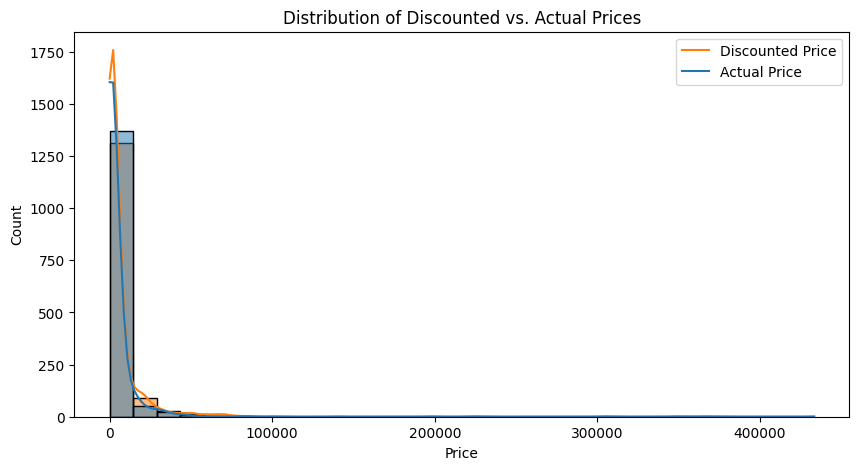

In [25]:
# 3. Distribution of discounted prices vs. actual prices
plt.figure(figsize=(10,5))
sns.histplot(df[['discounted_price', 'actual_price']], bins=30, kde=True)
plt.title("Distribution of Discounted vs. Actual Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend(["Discounted Price", "Actual Price"])
plt.show()

In [29]:
# 4. Average discount percentage across categories
avg_discount_per_category = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print(avg_discount_per_category)

category
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                 90.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                          90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                  90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                 88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers       87.5
                                                                                                                    ... 
OfficeProducts|OfficeElectronics|Calculators|Basic                                                                   0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories|StandMixerAccessories     0.0
Electronics|HomeAudio|M

In [30]:
# 5. Most popular product names (based on rating_count)
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
print(popular_products)

product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            2445.0
Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)          1948.0
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)            1806.0
Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White                                    1312.0
Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One Plus 8T/ 9/ 9R/ 9 pro/ 9RT/ 10R/ Nord & for All Ty

In [31]:
# 6. Most popular product keywords (based on occurrences in product_name)
from collections import Counter
import re

words = ' '.join(df['product_name'].dropna()).lower()
word_list = re.findall(r'\b\w+\b', words)
word_counts = Counter(word_list)
most_common_words = word_counts.most_common(10)
print(most_common_words)

[('with', 752), ('for', 674), ('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('and', 331), ('c', 289), ('3', 275), ('2', 267)]


In [32]:
# 7. Most popular product reviews (based on rating_count)
most_popular_reviews = df[['review_content', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)
print(most_popular_reviews)

                                         review_content  rating_count
1279  Does the job well,doesn't work on sand. though...         992.0
750   Nive,very good batteries received,Like,Good pr...         989.0
1059  Bottle quality is not good.,Best for hot water...         976.0
151   Not charging as fast as I'd have expected. May...         974.0
32    Not charging as fast as I'd have expected. May...         974.0
823   Not charging as fast as I'd have expected. May...         974.0
1272  Ok,The product works very well. The support is...         959.0
1259  I bought 5ltr 3kw model 10 days before Provide...         942.0
214   The remote works well and is pleasantly compat...         928.0
1262  It’s a good product and I’m using it since 1 w...         925.0


In [33]:
# 8. Correlation between discounted_price and rating
correlation = df[['discounted_price', 'rating']].corr()
print(correlation)

                  discounted_price    rating
discounted_price          1.000000  0.025332
rating                    0.025332  1.000000


In [34]:
# 9. Top 5 categories based on the highest ratings
top_5_categories = avg_rating_per_category.head(5)
print(top_5_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


In [35]:
# 10. Areas for improvement or optimization
missing_values = df.isnull().sum()
print("Missing Values Per Column:", missing_values)

price_analysis = df[['discounted_price', 'actual_price']].describe()
print("Price Analysis:", price_analysis)

if df.duplicated().sum() > 0:
    print("There are duplicated entries in the dataset.")

Missing Values Per Column: product_id                0
product_name              0
category                  0
discounted_price          0
actual_price              0
discount_percentage       0
rating                    1
rating_count           1139
about_product             0
user_id                   0
user_name                 0
review_id                 0
review_title              0
review_content            0
img_link                  0
product_link              0
dtype: int64
Price Analysis:        discounted_price   actual_price
count       1465.000000    1465.000000
mean        4318.813652    5827.899659
std        18767.906760   15755.694899
min           39.000000      39.000000
25%          329.000000     825.000000
50%          809.000000    1690.000000
75%         2089.000000    4400.000000
max       365766.000000  433296.000000


# **EDA-4**

In [59]:
df = pd.read_csv("/content/spotify.csv")

In [60]:
df.duplicated().sum()

27

In [81]:
# 1. Check for missing values and duplicates
df_cleaned = df.drop_duplicates()
df_cleaned

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


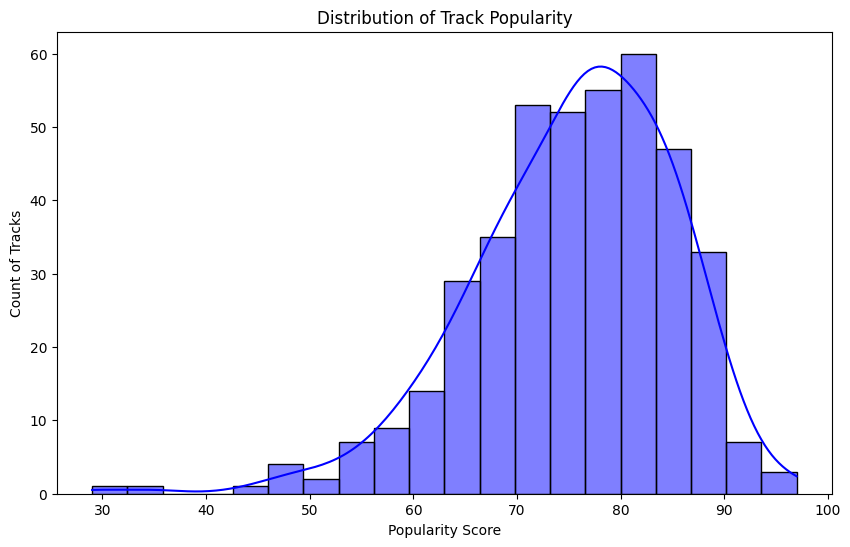

In [63]:
# 2. Distribution of popularity using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Popularity"], bins=20, kde=True, color="blue")
plt.xlabel("Popularity Score")
plt.ylabel("Count of Tracks")
plt.title("Distribution of Track Popularity")
plt.show()

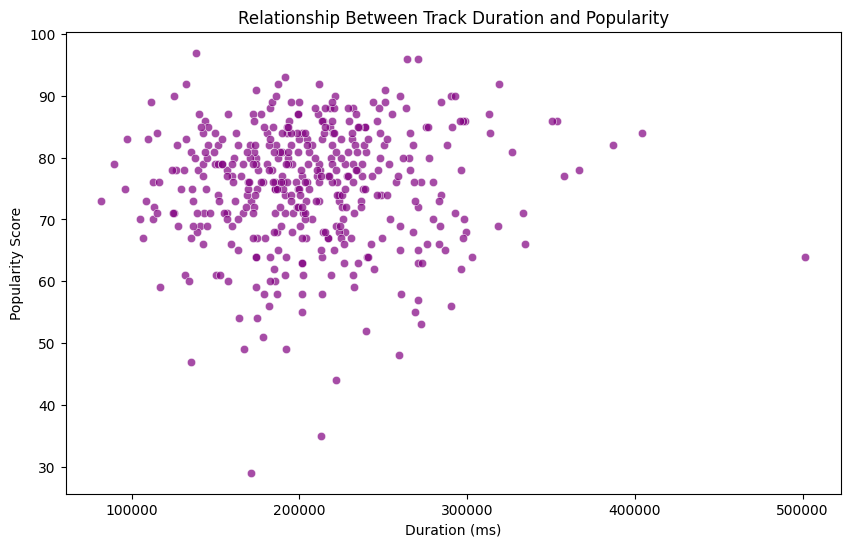

In [64]:
# 3. Relationship between popularity and duration (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned["Duration (ms)"], y=df_cleaned["Popularity"], alpha=0.7, color="purple")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity Score")
plt.title("Relationship Between Track Duration and Popularity")
plt.show()

<ipython-input-65-75726c4e11d0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis")


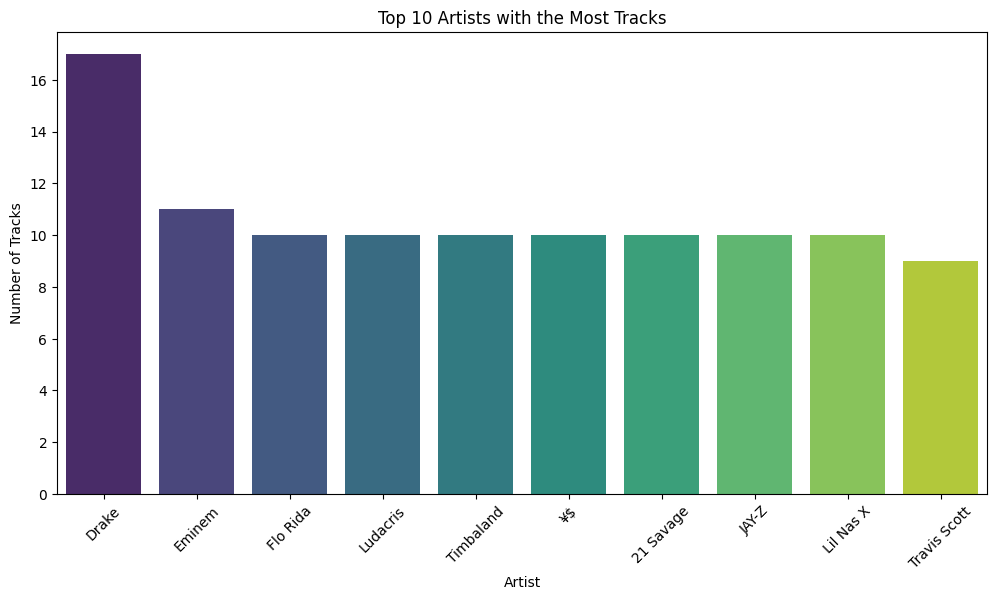

In [65]:
# 4. Artist with the highest number of tracks
top_artists = df_cleaned["Artist"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.title("Top 10 Artists with the Most Tracks")
plt.show()

In [66]:
# 5. Top 5 least popular tracks
least_popular_tracks = df_cleaned.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [67]:
# 6. Among top 5 most popular artists, find the one with highest average popularity
top_5_artists = df_cleaned["Artist"].value_counts().head(5).index
artist_avg_popularity = df_cleaned[df_cleaned["Artist"].isin(top_5_artists)].groupby("Artist")["Popularity"].mean()
print("Top 5 Artists by Average Popularity:")
print(artist_avg_popularity)

Top 5 Artists by Average Popularity:
Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64


In [68]:
# 7. Most popular track for each of the top 5 artists
top_tracks = df_cleaned[df_cleaned["Artist"].isin(top_5_artists)].groupby("Artist").apply(lambda x: x.nlargest(1, "Popularity"))[["Track Name", "Popularity"]]
print("Most Popular Track for Each Top Artist:")
print(top_tracks)

Most Popular Track for Each Top Artist:
                                            Track Name  Popularity
Artist                                                            
Drake     0    Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem    80                                Without Me          90
Flo Rida  300                       Low (feat. T-Pain)          84
Ludacris  371                             My Chick Bad          67
Timbaland 380                            The Way I Are          85


<ipython-input-68-da4c7b538004>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_tracks = df_cleaned[df_cleaned["Artist"].isin(top_5_artists)].groupby("Artist").apply(lambda x: x.nlargest(1, "Popularity"))[["Track Name", "Popularity"]]


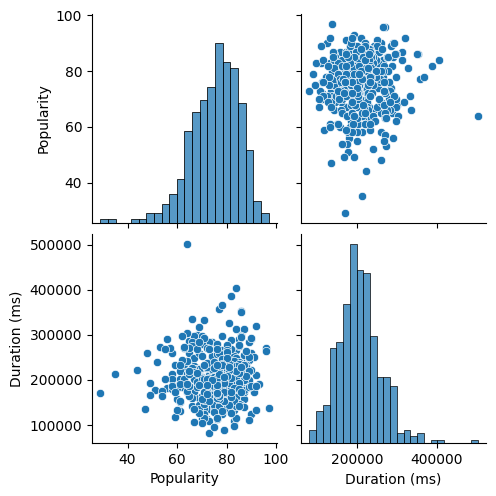

In [69]:
# 8. Pair plot for numerical variables
sns.pairplot(df_cleaned, vars=["Popularity", "Duration (ms)"])
plt.show()

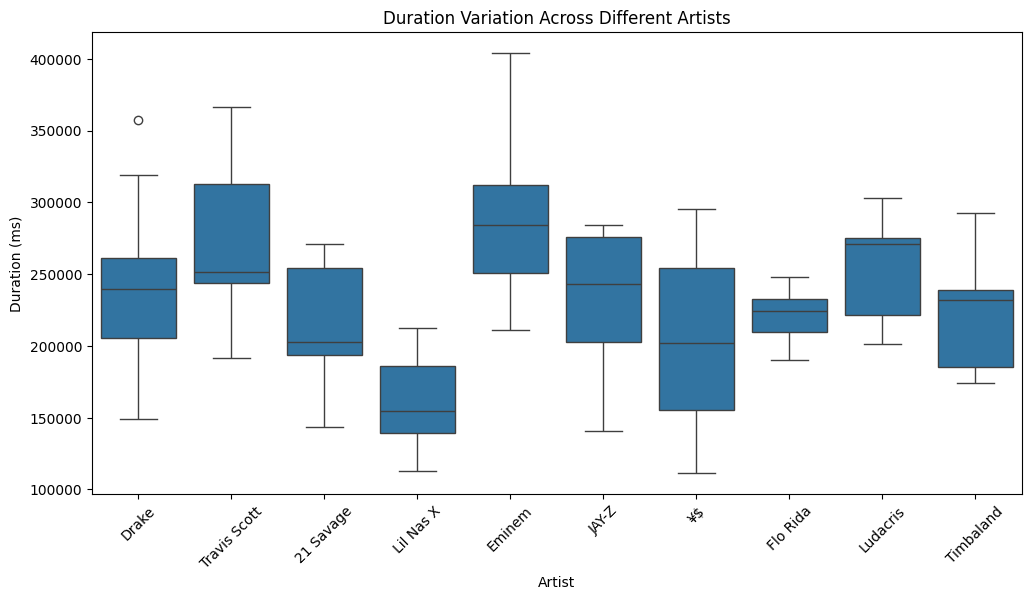

In [70]:
# 9. Duration variation across different artists (box plot)
top_10_artists = df_cleaned["Artist"].value_counts().head(10).index
duration_data = df_cleaned[df_cleaned["Artist"].isin(top_10_artists)]
plt.figure(figsize=(12, 6))
sns.boxplot(x="Artist", y="Duration (ms)", data=duration_data)
plt.xticks(rotation=45)
plt.title("Duration Variation Across Different Artists")
plt.show()

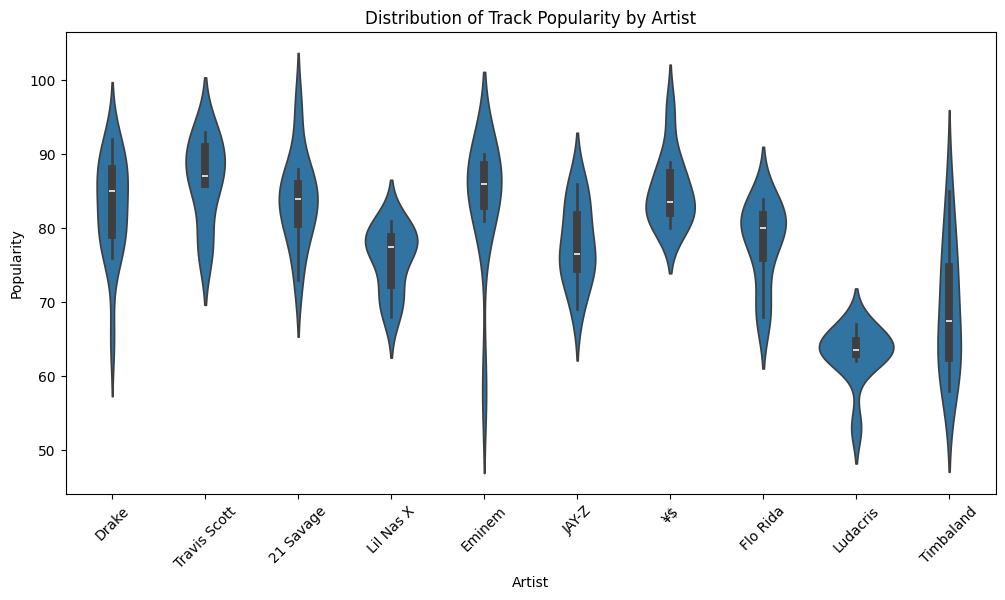

In [71]:
# 10. Distribution of track popularity for different artists (violin plot)
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=duration_data)
plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity by Artist")
plt.show()